In [1]:
# This case study demonstrates the use of PCA and Chi-squared values for feature selection
# and finally using K-Fold cross validation and Shuffled K-fold techniques for best model selection.

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint

In [2]:
np.random.seed(40)
data = pd.read_csv("churn.csv",sep=',',index_col=0)
y = data['Churn']
X = data.drop('Churn',axis=1)
print(f"{X}")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()
encoder = LabelEncoder()

def convert_and_remove_categorical_variables(X, to_convert=["Area_Code", "Voice_mail_Plan", "International_Plan"], 
                                             to_remove=["Phone_Number"]):
    X = X.drop(to_remove, axis=1)
    for column in to_convert:
        column_df = encoder.fit_transform(X[column])
        X[column] = column_df
    return X
X = convert_and_remove_categorical_variables(X)
print(f"Number of total columns and values:")
print(f"{len(X.columns)}\n{X.columns}")
X_sca = normalize(X)

       Account_Length  Area_Code Phone_Number International_Plan  \
State                                                              
KS                128        415     382-4657                 no   
OH                107        415     371-7191                 no   
NJ                137        415     358-1921                 no   
OH                 84        408     375-9999                yes   
OK                 75        415     330-6626                yes   
...               ...        ...          ...                ...   
HI                 50        408     365-8751                 no   
WV                152        415     334-9736                 no   
DC                 61        415     333-6861                 no   
DC                109        510     394-2206                 no   
VT                 86        415     373-8058                 no   

      Voice_mail_Plan  Num_of_Voice_mail_Messages  Total_Day_Minutes  \
State                                      

In [3]:
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest

# The null hypothesis for chi2 test is that "Two categorical variables are highly independent". Hence a high values
# of chi2 score means the variables are highly dependent.
chi2_f_selector = SelectKBest(score_func=chi2, k=6)
chi2_f_selector.fit(X_sca, y)
chi2_scores = pd.DataFrame(list(zip(X.columns, chi2_f_selector.scores_, chi2_f_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
print(chi2_scores)
scores = chi2_f_selector.scores_
p_values = chi2_f_selector.pvalues_
print(chi2_f_selector.get_support())
chi_s_mean = np.mean(scores)
print(f"=========================================================================================================")
print("Chi-Squared value for each feature.")
for i in range(0, len(X.columns)):
    if scores[i] > chi_s_mean:
        print(f"===========================================")
        print(f"Feature Name: {X.columns[i]}\n Chi-Squared value: {scores[i]}\n probablity(p-value): {p_values[i]}")

                               ftr     score      pval
0                   Account_Length  0.152411  0.696241
1                        Area_Code  0.002446  0.960554
2               International_Plan  0.732827  0.391968
3                  Voice_mail_Plan  0.108306  0.742081
4       Num_of_Voice_mail_Messages  2.679428  0.101652
5                Total_Day_Minutes  2.299713  0.129398
6                  Total_Day_Calls  0.361563  0.547639
7                 Total_day_Charge  0.390889  0.531832
8                Total_Eve_Minutes  0.000123  0.991136
9                  Total_Eve_Calls  0.550399  0.458155
10                Total_Eve_Charge  0.000011  0.997396
11             Total_Night_Minutes  0.205561  0.650269
12              Total_Night_Calls_  0.564047  0.452634
13              Total_Night_Charge  0.009251  0.923376
14     Total_International_Minutes  0.001331  0.970893
15                Total_Intl_Calls  0.119356  0.729734
16               Total_Intl_Charge  0.000361  0.984832
17  Number

##########################################################################################################
Features:
##########################################################################################################

0: Account_Length
1: Area_Code
2: International_Plan
3: Voice_mail_Plan
4: Num_of_Voice_mail_Messages
5: Total_Day_Minutes
6: Total_Day_Calls
7: Total_day_Charge
8: Total_Eve_Minutes
9: Total_Eve_Calls
10: Total_Eve_Charge
11: Total_Night_Minutes
12: Total_Night_Calls_
13: Total_Night_Charge
14: Total_International_Minutes
15: Total_Intl_Calls
16: Total_Intl_Charge
17: Number_Customer_Service_calls_


##########################################################################################################
Importance of each feature in reflected by the magnitude of of corresponding values in the EigenVector:
##########################################################################################################


For PC-0:
Corresponding features and their magnitu

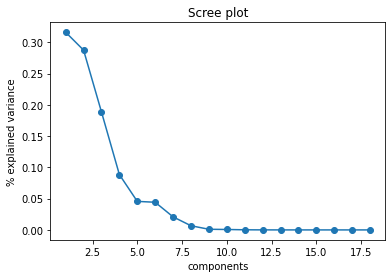

In [4]:
pca = PCA(n_components=18)
pca.fit(X_sca)
X_2 = pca.transform(X_sca)

print(f"##########################################################################################################")
print(f"Features:")
print(f"##########################################################################################################\n")

for index, feature in enumerate(X.columns):
    print(f"{index}: {feature}")

print("\n")
print(f"##########################################################################################################")
print(f"Importance of each feature in reflected by the magnitude of of corresponding values in the EigenVector:")
print(f"##########################################################################################################")

for index, features in enumerate(pca.components_):
    print("\n")
    print(f"For PC-{index}:")
    print(f"Corresponding features and their magnitudes:")
    np_f = np.array(features)
    print(f"-----------------------------------")
    print(f"Features with highest magnitudes:")
    for index, value in enumerate(np_f):
        if value > 0.1:           
            print(f"{index}: {value} ----> {X.columns[index]}")
    print(f"-----------------------------------")
    print(f"{np_f}")
    
print("\n")
print(f"##########################################################################################################")
print(f"Principal Component Variance percentage:")
print(f"Variance explained by each principal component:")
print(f"##########################################################################################################")

for index, pc in enumerate(pca.explained_variance_ratio_):    
    print(f"Principal component-{index} explains {pc*100} variance in the data.")
    
print("\n")    
print(f"##########################################################################################################")
print(f"{pca.explained_variance_}")
print(f"##########################################################################################################")


plt.plot(range(1,len(pca.components_)+1),pca.explained_variance_ratio_,'-o')
plt.xlabel('components')
plt.ylabel('% explained variance')
plt.title("Scree plot")
plt.show()

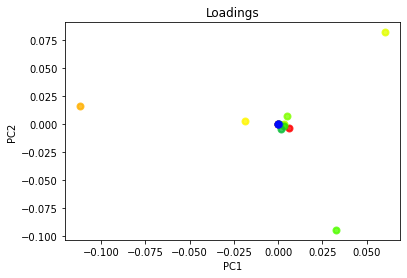

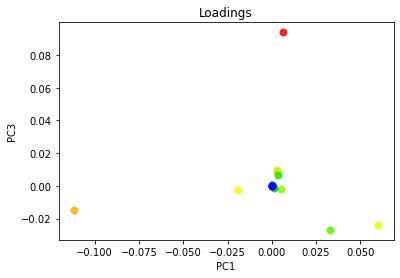

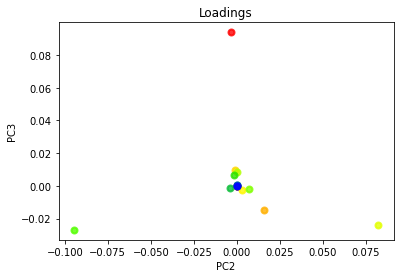

In [5]:
prism=[]
lw = 2
for index, column in enumerate(X.columns):
    prism.append(cm.prism(index))

for i in range(0,len(pca.components_[0])):
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    plt.scatter(pca_0_loadings, pca_1_loadings,color=prism[i], alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()    

for i in range(0,len(pca.components_[0])):
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_0_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

for i in range(0,len(pca.components_[0])):
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_1_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [16]:
# The evaluation process includes iterating through each classifier which in this case 
# are Logistic Regression, Decision Trees and Random Forests.
# K-Fold cross validation and Shuffled Split CV is implemented on each model/classifier.
# As an example, for a 5-fold cross validation there would be 5 values for each metric(accuracy, precision and au_roc)
# for each model.
# The mean of these 5 metrics are taken for each cross validation techniques and later the mean of the techniques
# is calculated for each classification model.
# The model having the highest value would have the best performance.

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluation_process(X_train, y_train, n_folds, shuffled):
    np.random.seed(42)
   
    models = [LR(), DT(), RF()]
    best_model = models[0]
    
    model_metric_means = []
    model_metric_means_kfold = []
    model_metric_means_shuf = []
    
    def kfold_cv(pipeline, X_train, y_train, n_folds, shuffled):
        roc_auc = cross_val_score(pipeline, X_train, y_train, cv=n_folds, scoring='roc_auc').mean()
        acc = cross_val_score(pipeline, X_train, y_train, cv=n_folds, scoring='accuracy').mean()
        pre = cross_val_score(pipeline, X_train, y_train, cv=n_folds, scoring='precision').mean()
        k_fold = (roc_auc + acc + pre)/3
        
        return k_fold
        
    def shuf_cv(pipeline, X_train, y_train, n_folds, shuffled):
        from sklearn.model_selection import ShuffleSplit
        shuffle_split = ShuffleSplit(n_splits=n_folds)
        roc_auc = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='roc_auc').mean()
        acc = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='accuracy').mean()
        pre = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='precision').mean()
        stra = (roc_auc + acc + pre)/3
        
        return stra
    
    # Iterate over each model
    for model in models:
        # Build a pipeline
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import StandardScaler
        pipeline = make_pipeline(StandardScaler(), model)
        
        # Evaluate metrics for each evaluation process
        from sklearn.model_selection import cross_val_score
        import warnings
        warnings.filterwarnings("ignore", category=FutureWarning)
        
        k_fold = kfold_cv(pipeline, X_train, y_train, n_folds, shuffled)
        model_metric_means_kfold.append(k_fold)
        if shuffled == True:
            stra = shuf_cv(pipeline, X_train, y_train, n_folds, shuffled)
            model_metric_means_shuf.append(stra)
        else:
            stra = None
        if stra:
            final_mean = (k_fold + stra)/2
        else:
            final_mean = k_fold
        model_metric_means.append(final_mean)
        
    if shuffled == True:
        max_metric = max(max(model_metric_means_kfold), max(model_metric_means_shuf))
    else:
        max_metric = max(model_metric_means_kfold)
    if max_metric in model_metric_means_kfold:
        best_classifier = models[model_metric_means_kfold.index(max(model_metric_means_kfold))]
        pipeline = make_pipeline(StandardScaler(), best_classifier)
        k_fold = kfold_cv(pipeline, X_train, y_train, n_folds, shuffled)
    else:
        best_classifier = models[model_metric_means_shuf.index(max(model_metric_means_shuf))]
        pipeline = make_pipeline(StandardScaler(), best_classifier)
        stra = shuf_cv(pipeline, X_train, y_train, n_folds, shuffled)
        
    # Fit your model to the training set
    
    best_model = best_classifier.fit(X_train, y_train)
    print(best_model)
    
    # Your output should be one of the classifiers in the models list fitted to the training data
    return best_model
evaluation_process(X_train, y_train, n_folds=10, shuffled=True)

RandomForestClassifier()


RandomForestClassifier()

In [20]:
def get_evaluation_test_set(model, X_test, y_test):
    np.random.seed(42)
    accuracy = 0
    precision = 0
    auroc = 0

    from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    auroc = roc_auc_score(y_test, predictions)
    
    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nAUROC: {auroc}")
    
    return accuracy, precision, auroc
best_model = evaluation_process(X_train, y_train, 5, True)
get_evaluation_test_set(best_model, X_test, y_test)

RandomForestClassifier()
Accuracy: 0.958
Precision: 0.9337349397590361
AUROC: 0.870142461638477


(0.958, 0.9337349397590361, 0.870142461638477)